In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from PIL import Image

In [3]:
image_colored = Image.open("/content/drive/MyDrive/6CS012 AI/Worksheet 1/amit.jpg")


 2.1 Exercise- 1:

In [4]:
print("Format:", image_colored.format)
print("Mode:", image_colored.mode)
print("Size:", image_colored.size)

Format: JPEG
Mode: RGB
Size: (960, 639)


matplotlib to display the image

Displaying image using Pillow's .show() method:


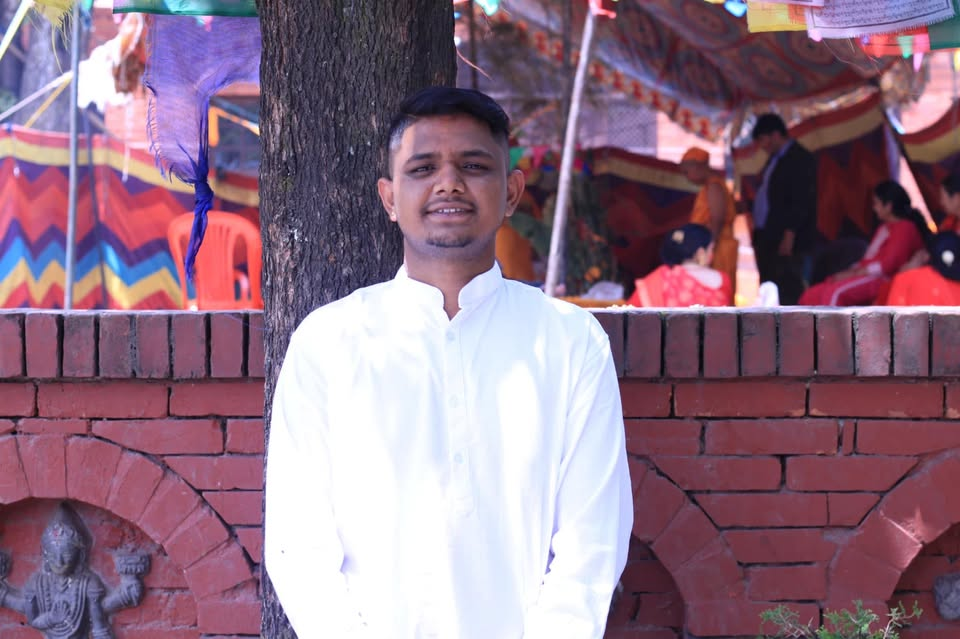

In [5]:
print("Displaying image using Pillow's .show() method:")
display(image_colored)

 2. Display only the top left corner of 100x100 pixels.

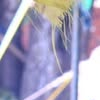

In [6]:

# Load the image
image_path = "/content/drive/MyDrive/6CS012 AI/Worksheet 1/amit.jpg"  # Replace with your image path
image = Image.open(image_path)

# Crop the top-left 100x100 region
top_left_crop = image.crop((0, 0, 100, 100))

# Display the cropped image
display(top_left_crop)

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
 Array Indexing

In [7]:
import numpy as np
image_array_colored = np.array(image_colored)
image_array_colored.shape

(639, 960, 3)

 3. Show the three color channels (R, G, B).

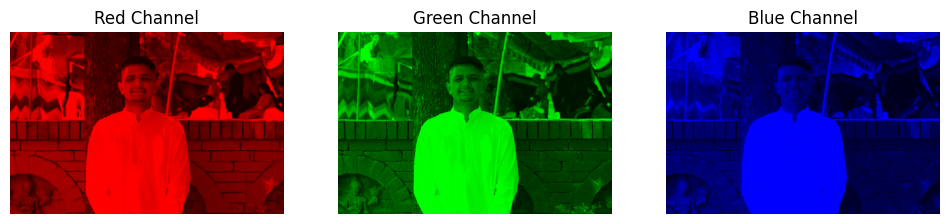

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
img_path = "/content/drive/MyDrive/6CS012 AI/Worksheet 1/amit.jpg"
img_array = cv2.imread(img_path)  # Read image
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Red channel
red_channel = img_array.copy()
red_channel[:, :, 1:] = 0  # Remove Green and Blue

# Green channel
green_channel = img_array.copy()
green_channel[:, :, [0, 2]] = 0  # Remove Red and Blue

# Blue channel
blue_channel = img_array.copy()
blue_channel[:, :, :2] = 0  # Remove Red and Green

# Display R, G, B channels side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(red_channel)
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(green_channel)
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(blue_channel)
axes[2].set_title("Blue Channel")  # Fixed incorrect line
axes[2].axis("off")

plt.show()


 4. Modify the top 100 ×100 pixels to a value of 210 and display the resulting image:

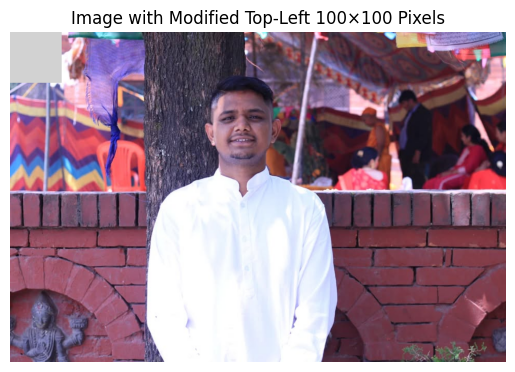

In [10]:
img_path = "/content/drive/MyDrive/6CS012 AI/Worksheet 1/amit.jpg"
img_array = cv2.imread(img_path)  # Read image
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Modify the top-left 100×100 pixels to a light gray color (210)
img_array[:100, :100] = 210  # Set pixel values to 210

# Display the modified image
plt.imshow(img_array)
plt.title("Image with Modified Top-Left 100×100 Pixels")
plt.axis("off")
plt.show()

 2.2 Exercise- 2:

 1. Load and display a grayscale image.

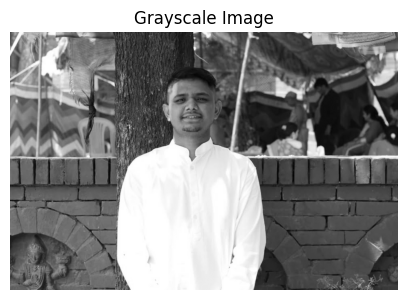

In [11]:
image_path = "/content/drive/MyDrive/6CS012 AI/Worksheet 1/amit.jpg"  # Update the correct path
image_gray = Image.open(image_path).convert("L")  # Convert to grayscale
gray_array = np.array(image_gray)
plt.figure(figsize=(5,5))
plt.imshow(gray_array, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

 2. Extract and display the middle section of the image (150 pixels)

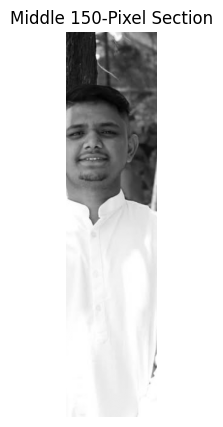

In [12]:
height, width = gray_array.shape  # Get image dimensions
middle_x = width // 2  # Center of the width
middle_section = gray_array[:, middle_x-75:middle_x+75]  # Extract 150-pixel-wide section

plt.figure(figsize=(5,5))
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0)


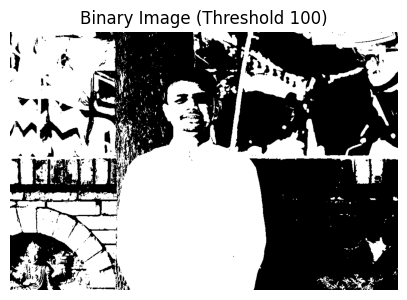

In [13]:
threshold = 100
binary_image = np.where(gray_array < threshold, 0, 255).astype(np.uint8)  # Convert to binary (0 or 255)

plt.figure(figsize=(5,5))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Threshold 100)")
plt.axis("off")
plt.show()

 4. Rotate the image 90 degrees clockwise and display the result.

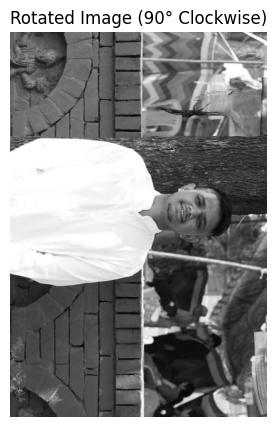

In [14]:
rotated_image = np.rot90(gray_array, k=3)  # Rotate 90° clockwise (3 times counterclockwise)

plt.figure(figsize=(5,5))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

 5. Convert the grayscale image to an RGB image

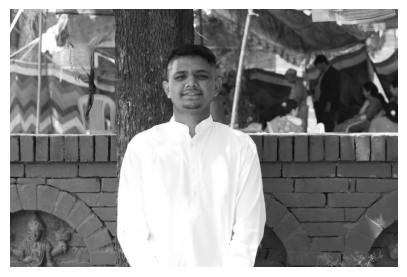

In [15]:
rgb_image = np.stack([gray_array] * 3, axis=-1)  # Replicate grayscale into R, G, B channels

plt.figure(figsize=(5,5))
plt.imshow(rgb_image)

plt.axis("off")
plt.show()


 3 Image Compression and Decompression using PCA.

 1. Load and Prepare Data

 • Fetch an image of you choice.{If colour convert to grayscale}

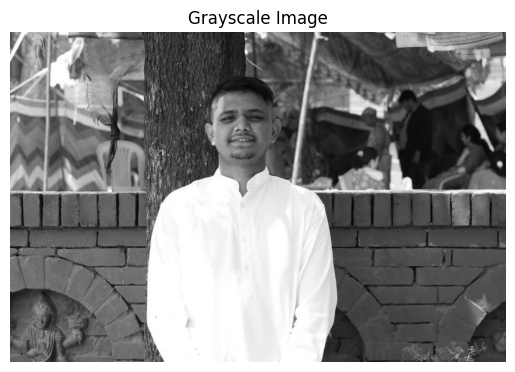

In [17]:
# Load the image and convert it to grayscale
image_path = "/content/drive/MyDrive/6CS012 AI/Worksheet 1/amit.jpg"
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert the image to a NumPy array
image_array = np.array(image)  # Convert to NumPy array (no float conversion)

# Display the grayscale image using Matplotlib
plt.imshow(image_array, cmap="gray")  # Display in grayscale
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


Center the dataset- Standaridze the Data.

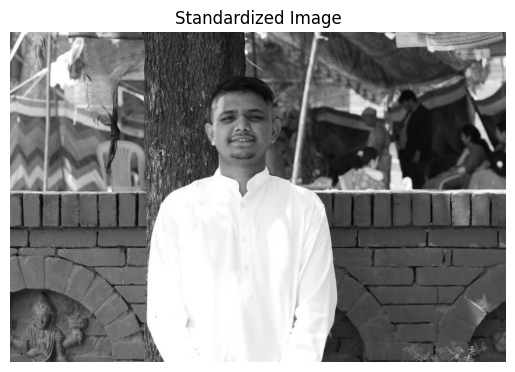

In [18]:
# Standardize the data by centering (subtracting mean) and scaling (dividing by standard deviation)
mean = np.mean(image_array)
std_dev = np.std(image_array)
standardized_image = (image_array - mean) / std_dev

# Display the standardized image using Matplotlib
plt.imshow(standardized_image, cmap="gray")  # Display in grayscale
plt.title("Standardized Image")
plt.axis("off")
plt.show()

Calculate the covaraince matrix of the Standaridze data.

In [19]:
covariance_matrix = np.cov(standardized_image, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[0.39244643 0.38994572 0.37225586 ... 0.09524069 0.09813295 0.0972154 ]
 [0.38994572 0.40168299 0.39356847 ... 0.08624734 0.08859676 0.08770974]
 [0.37225586 0.39356847 0.39885271 ... 0.07289899 0.07517511 0.07486797]
 ...
 [0.09524069 0.08624734 0.07289899 ... 0.42276649 0.43200949 0.43099886]
 [0.09813295 0.08859676 0.07517511 ... 0.43200949 0.44440512 0.44539684]
 [0.0972154  0.08770974 0.07486797 ... 0.43099886 0.44539684 0.44912762]]


 2. Eigen Decomposition and Identifying Principal Components:

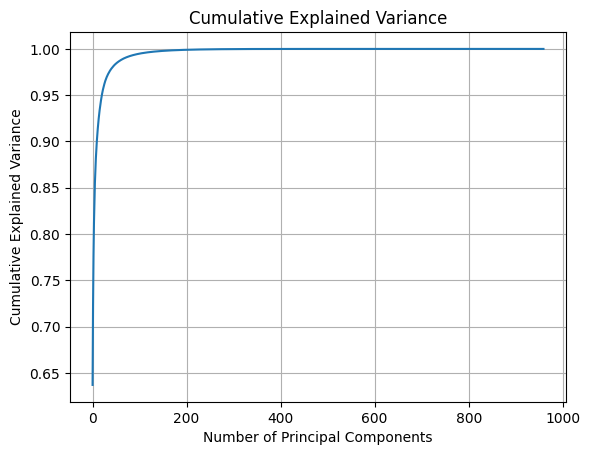

Top 5 Eigenvalues: [443.89204883  60.19232147  37.38905885  24.76887621  15.91311501]
Top 5 Eigenvectors:
 [[-0.01418479 -0.0119998   0.04481991 -0.00492539  0.03880738]
 [-0.01515347 -0.01259291  0.04443382 -0.00371449  0.03925545]
 [-0.01558175 -0.01303177  0.04465699 -0.00346793  0.03704136]
 ...
 [-0.00502263 -0.04627749 -0.03318468 -0.01197894  0.02044634]
 [-0.00555133 -0.04647734 -0.03420331 -0.01085951  0.01803779]
 [-0.00575756 -0.04662823 -0.03439068 -0.00834927  0.01482277]]


In [21]:
# Eigen decomposition (compute eigenvalues and eigenvectors)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort the eigenvalues in descending order and get the corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues_sorted = eigenvalues[sorted_indices]  # Sorted eigenvalues
eigenvectors_sorted = eigenvectors[:, sorted_indices]  # Sorted eigenvectors
# Plot the cumulative sum of the eigenvalues (Explained Variance)
# This helps in identifying how much variance is captured by each component
cumulative_variance = np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted)


# Plot the cumulative explained variance
plt.plot(cumulative_variance)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Choose the top k eigenvectors based on the sorted eigenvalues
k = 5  # Choose top 5 eigenvectors (can adjust this as needed)
top_k_eigenvectors = eigenvectors_sorted[:, :k]

print(f"Top {k} Eigenvalues:", eigenvalues_sorted[:k])
print(f"Top {k} Eigenvectors:\n", top_k_eigenvectors)

 3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec
tors(PCs) to obtain a lower-dimensional representation.

In [24]:
# Select the number of principal components (k) for reconstruction
k = 50  # You can choose different values like 5, 10, 50, etc.

# Select the top k eigenvectors (Principal Components)
top_k_eigenvectors = eigenvectors_sorted[:, :k]  # Select top k eigenvectors

# Project the original standardized image onto the top k eigenvectors (lower-dimensional representation)
transformed_data = np.dot(standardized_image, top_k_eigenvectors)  # Lower-dimensional data

# Reconstruct the data by multiplying the transformed data back by the top k eigenvectors
reconstructed_data = np.dot(transformed_data, top_k_eigenvectors.T)  # Reconstructed image


 Experiments: Pick Four different combination of principal components with various ex
plained variance value and compare the result.
 • Display the Results and Evaluate.

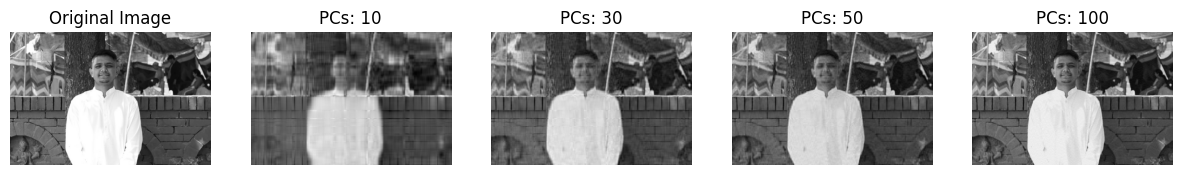

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA

# Load and preprocess image
img_path = "/content/drive/MyDrive/6CS012 AI/Worksheet 1/amit.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Normalize image (0 to 1)
img = img / 255.0

# Apply PCA
pca = PCA(n_components=100)  # Select 100 PCs for transformation
transformed = pca.fit_transform(img)  # Transform image

# Reconstruct the image using different numbers of principal components
components_list = [10, 30, 50, 100]  # Different PC choices for experiment
reconstructed_images = []

for n in components_list:
    pca_reconstruct = PCA(n_components=n)
    transformed_reduced = pca_reconstruct.fit_transform(img)
    img_reconstructed = pca_reconstruct.inverse_transform(transformed_reduced)
    reconstructed_images.append(img_reconstructed)

# Display the original and reconstructed images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Show original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show reconstructed images with different PCs
for i, (n, rec_img) in enumerate(zip(components_list, reconstructed_images)):
    axes[i+1].imshow(rec_img, cmap="gray")
    axes[i+1].set_title(f"PCs: {n}")
    axes[i+1].axis("off")

plt.show()
